## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable
import pyregion

fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
#rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'
regDir = rootDir+'inIms/'+'regions/slice_regions/'

figDir = rootDir+'sedFigs/slices/'

nameRoot = ['ELobeSl','WLobeSl']

ELobeDir = rootDir+'ELobe/'
WLobeDir = rootDir+'WLobe/'
#CoreDir = rootDir+'kore/'

dirNames = [ELobeDir,WLobeDir]

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [2]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_CI_over_CIOFF(tot,mod_CI,mod_CIOFF,mod_JP,statsCI,statsCIOFF,statsJP,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod_CI[0] - 30)).argmin()
    totplot = ax1.errorbar(tot['Frequency [MHz]'],tot['Integrated Flux [Jy]'], yerr=tot['Error [Jy]'],
             marker='o', color=color_plot[0], linestyle=' ',label=labe,capsize=6) 
    
    ax1.plot(mod_CI[0][idx_min:idx_max],mod_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle=':',label='CI',alpha=0.5)


    idx_br = (np.abs(mod_CI[0] - float(statsCI['break']))).argmin()
    ax1.axvline(statsCI['break'],ymin=0,ymax=0.58,ls=':',c=color_plot[1],lw=2,alpha=0.5)

        
    ax1.plot(mod_JP[0][idx_min:idx_max],mod_JP[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle='-.',label='JP',alpha=0.5)
    idx_br = (np.abs(mod_CI[0] - float(statsJP['break']))).argmin()
    ax1.axvline(statsJP['break'],ymin=0,ymax=0.58,ls='-.',c=color_plot[1],lw=2,alpha=0.5)
   

    ax1.plot(mod_CIOFF[0][idx_min:idx_max],mod_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[2], linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod_CIOFF[0] - float(statsCIOFF['break']))).argmin()
    ax1.axvline(statsCIOFF['break'],ymin=0,ymax=0.55,ls='--',c=color_plot[2],lw=2,alpha=0.5)
    


    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


	+---------+
	ELobeSl0
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.01720498 |
|    break     |   10915.87  |
|    chisq     |   60.79459  |
|    chired    |   4.676507  |
|  break_inf   |   -4129.61  |
|    alpha     |  0.6380857  |
|     ndf      |     13.0    |
| alpha_errinf | -0.04109484 |
|     norm     |   2.40953   |
|  break_sup   |   1779.021  |
+--------------+-------------+ +--------------+--------------+
|    CIOFF     |    value     |
+--------------+--------------+
|   t_errinf   |  -0.7258116  |
|    tratio    |  0.8912509   |
|   t_errsup   | 3.813374e-08 |
|    break     |   72532.36   |
|    chisq     |   28.14724   |
|    alpha     |  0.6437173   |
| alpha_errinf | -0.03500052  |
| alpha_errsup |  0.01559403  |
|    chired    |   2.345603   |
|     ndf      |     12.0     |
|  break_inf   |  -60521.64   |
|  break_sup   |   1389.213   |
|     norm     |  0.6523539   |
+--------------+--

	+---------+
	ELobeSl6
	+---------+
+--------------+------------+
|      CI      |   value    |
+--------------+------------+
| alpha_errsup | 0.03330135 |
|    break     |  3582.559  |
|    chisq     |  63.45323  |
|    chired    |  4.881018  |
|  break_inf   | -1228.055  |
|    alpha     | 0.4332391  |
|     ndf      |    13.0    |
| alpha_errinf | -0.0332391 |
|     norm     | 0.7418082  |
|  break_sup   |  985.581   |
+--------------+------------+ +--------------+-------------+
|    CIOFF     |    value    |
+--------------+-------------+
|   t_errinf   | -0.04314852 |
|    tratio    |  0.08780414 |
|   t_errsup   |  0.01966835 |
|    break     |   3479.532  |
|    chisq     |   42.55999  |
|    alpha     |     0.4     |
| alpha_errinf |     -0.0    |
| alpha_errsup |  0.02152913 |
|    chired    |   3.546666  |
|     ndf      |     12.0    |
|  break_inf   |  -715.0951  |
|  break_sup   |   702.4418  |
|     norm     |  0.7433494  |
+--------------+-------------+ +--------------+-

	+---------+
	WLobeSl5
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.01735926 |
|    break     |   10223.84  |
|    chisq     |   109.9651  |
|    chired    |   8.458851  |
|  break_inf   |  -3028.237  |
|    alpha     |  0.6540502  |
|     ndf      |     13.0    |
| alpha_errinf | -0.03208857 |
|     norm     |   1.499764  |
|  break_sup   |   2483.799  |
+--------------+-------------+ +--------------+--------------+
|    CIOFF     |    value     |
+--------------+--------------+
|   t_errinf   |  -0.6075235  |
|    tratio    |  0.8912509   |
|   t_errsup   | 3.812542e-08 |
|    break     |   54535.89   |
|    chisq     |   16.32585   |
|    alpha     |  0.6153915   |
| alpha_errinf | -0.03468719  |
| alpha_errsup |  0.02766752  |
|    chired    |   1.360487   |
|     ndf      |     12.0     |
|  break_inf   |  -40034.71   |
|  break_sup   |   6718.269   |
|     norm     |  0.5118668   |
+--------------+--

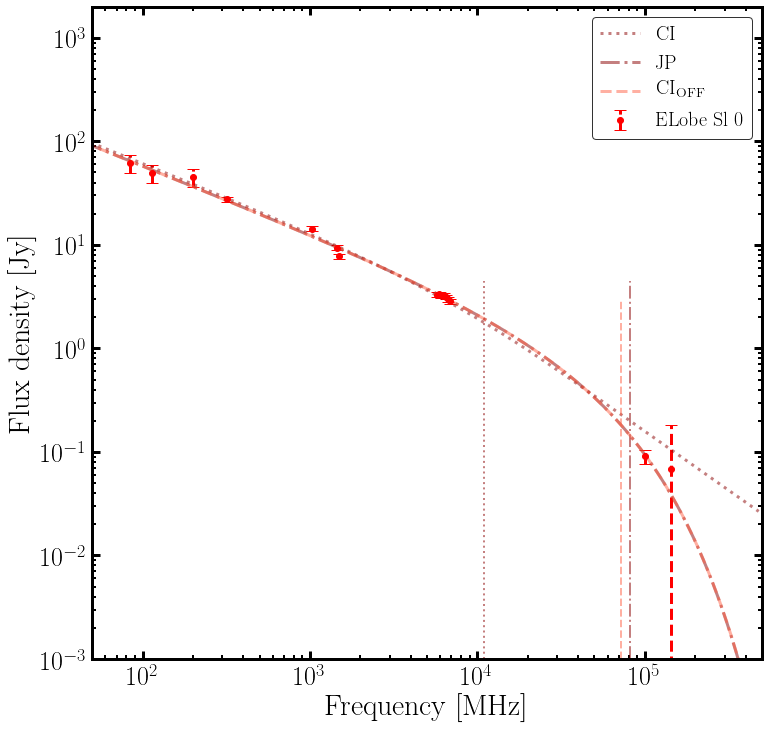

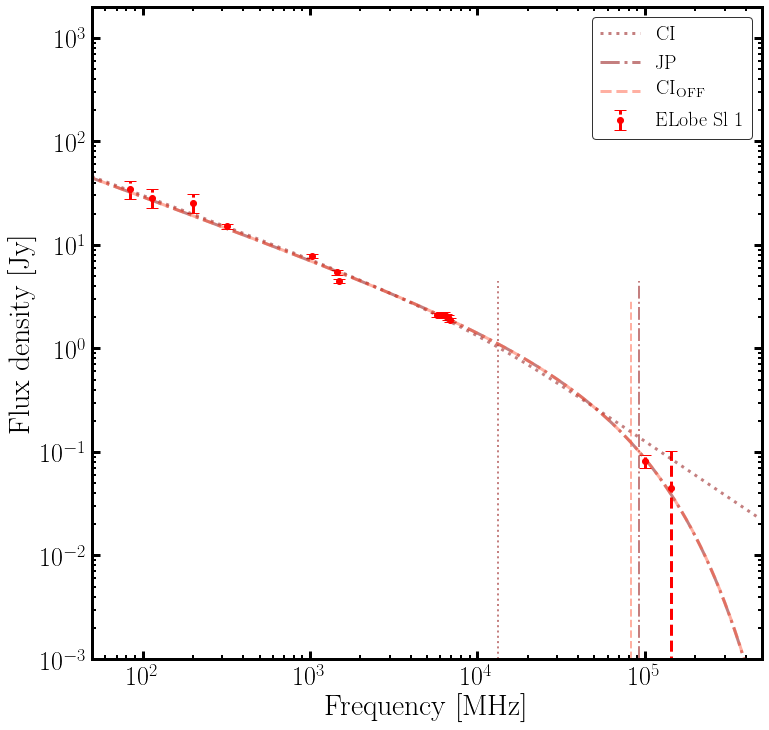

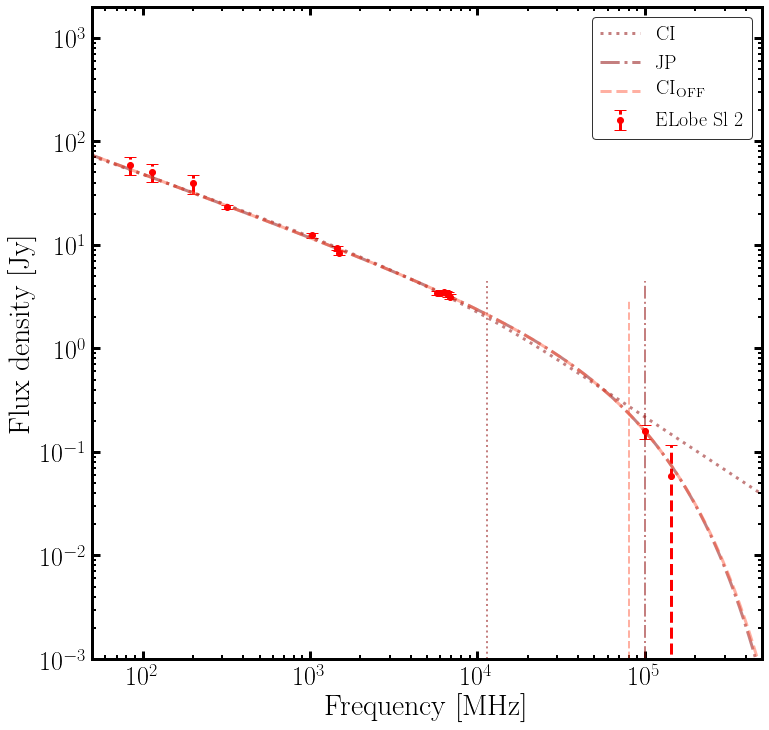

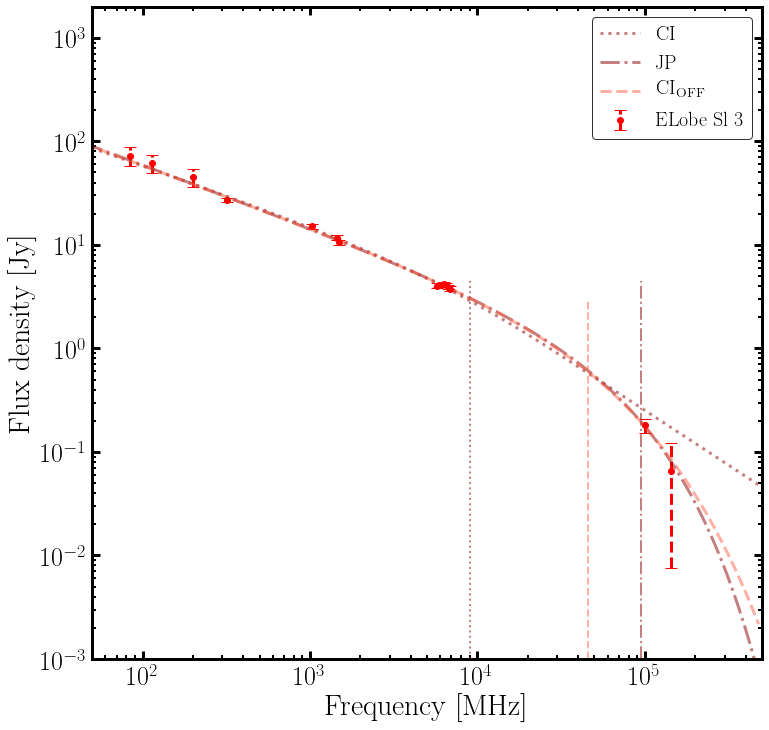

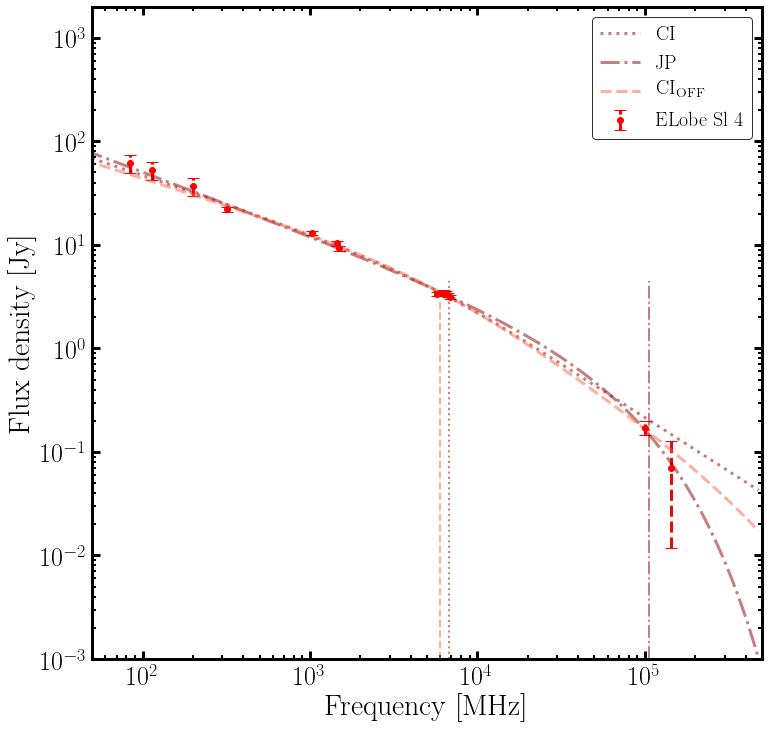

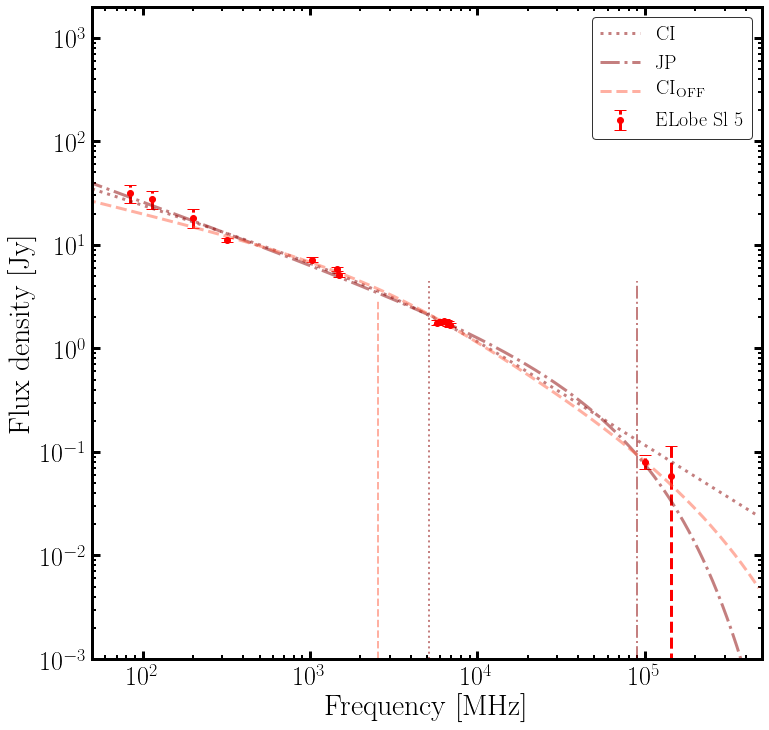

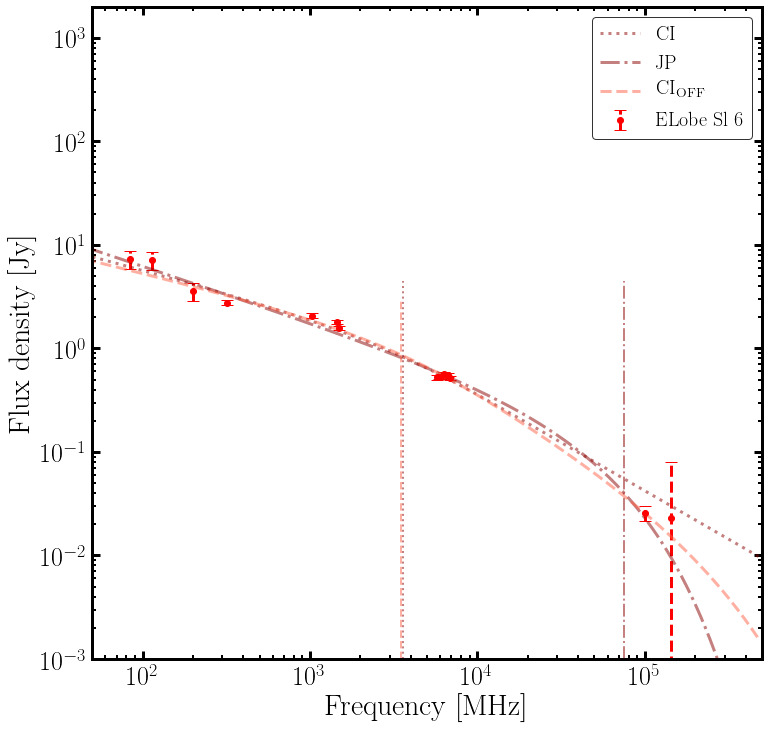

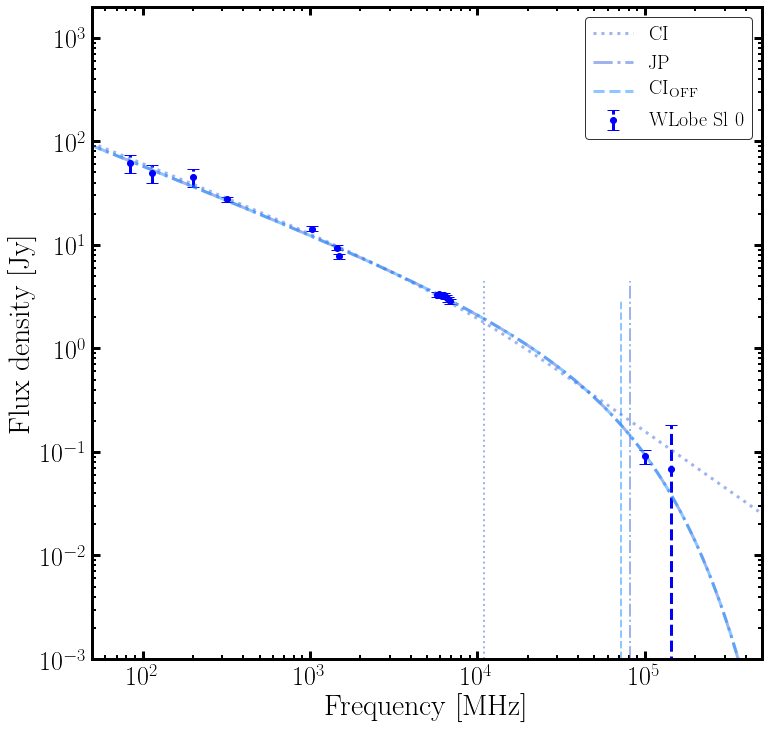

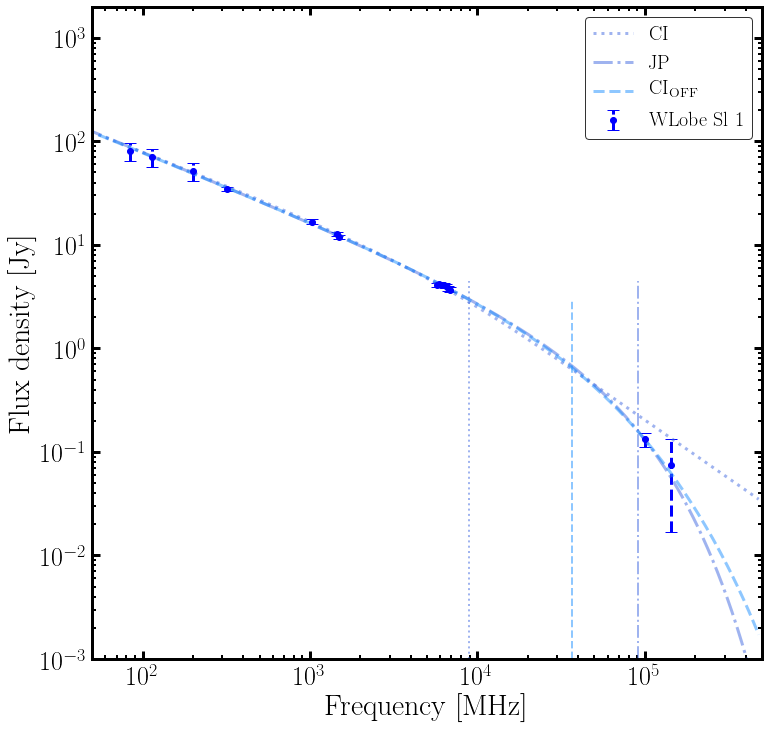

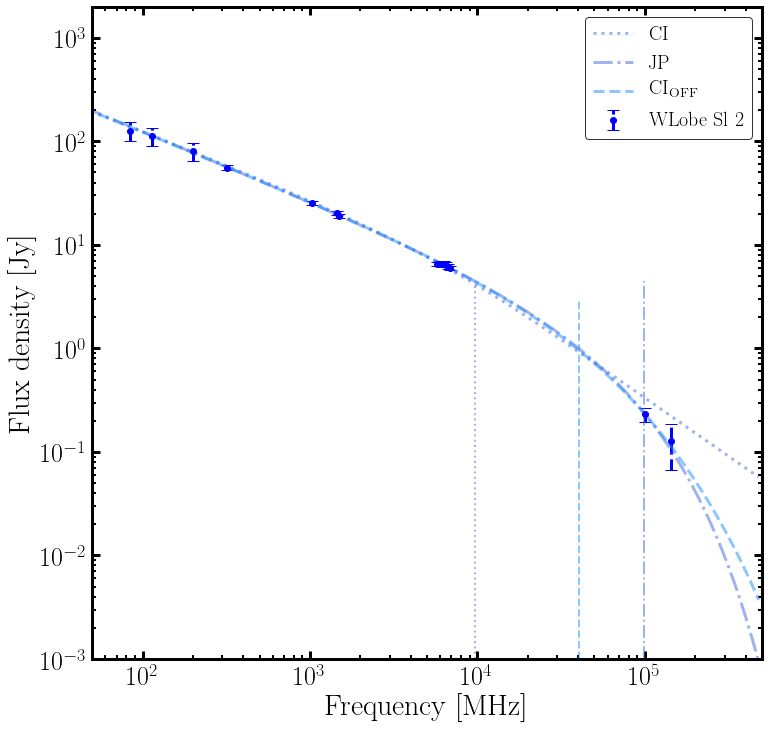

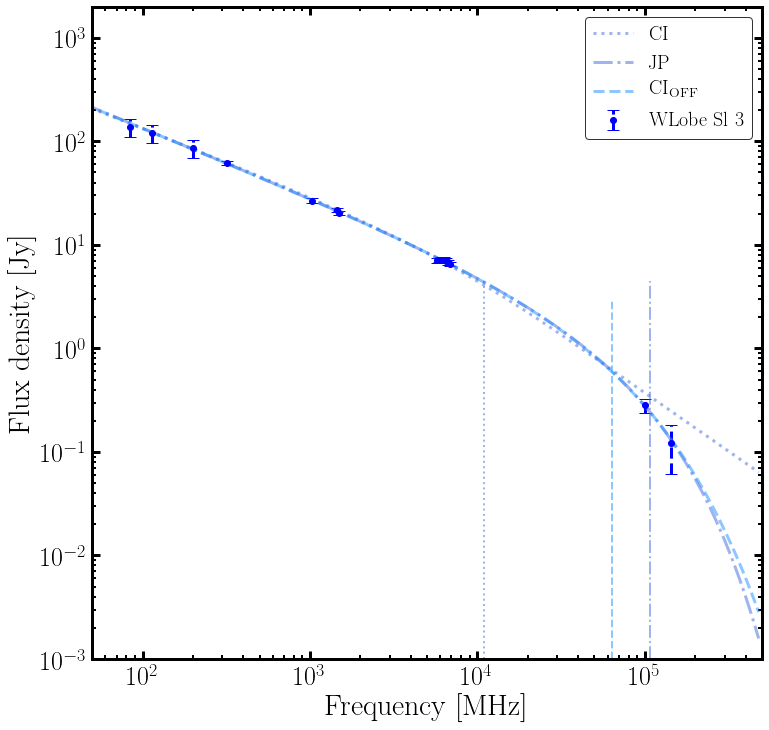

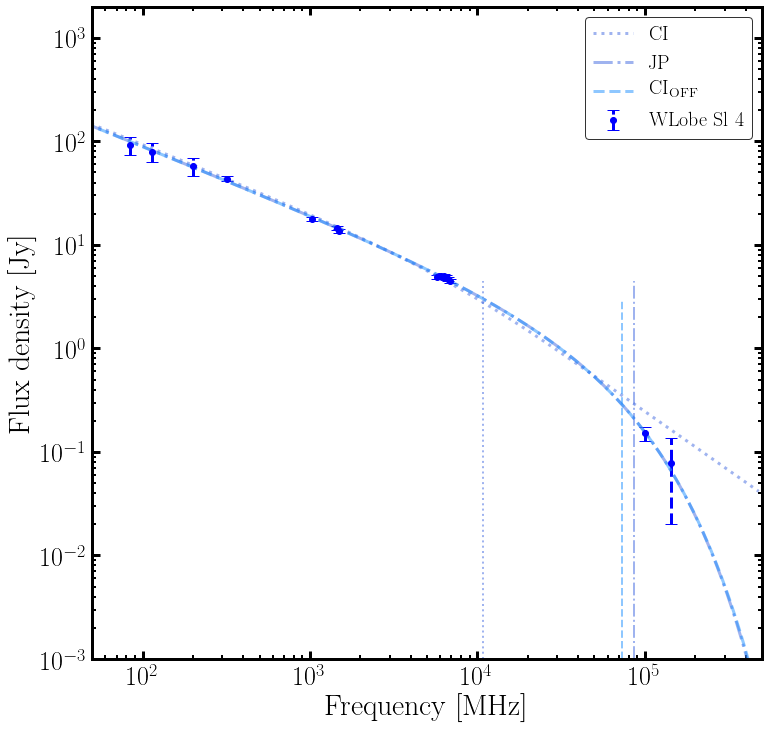

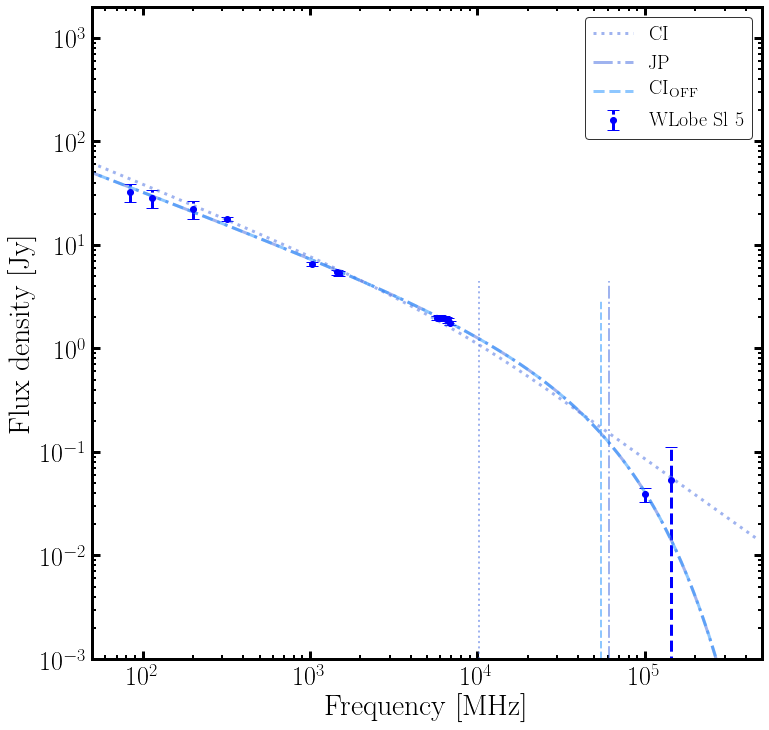

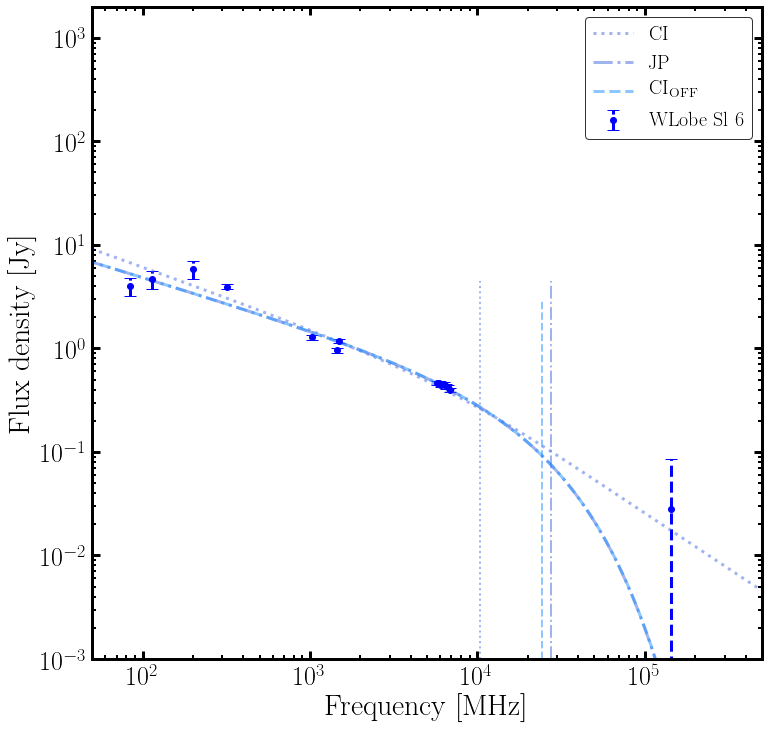

In [3]:
lobe = ['ELobe','WLobe']
lobeAcr = ['EL','WL']

colorW = ['blue','royalblue','dodgerblue']
colorE = ['red','darkred','tomato']
colors = [colorE,colorW]


breaksCI = np.zeros([2,7,4])
chiCI = np.zeros([2,7,2])
normCI = np.zeros([2,7,2])


breaksCI[:,:,3] = [145,290,435,580,725,865,1010]
breaksCI[:,:,3] *= 101/1e3
chiCI[:,:,1] = breaksCI[:,:,3].copy()
normCI[:,:,1] = breaksCI[:,:,3].copy()


breaksCIOFF = np.zeros([2,7,4])
chiCIOFF = np.zeros([2,7,2])
normCIOFF = np.zeros([2,7,2])


breaksCIOFF[:,:,3] = [145,290,435,580,725,865,1010]
breaksCIOFF[:,:,3] *= 101/1e3
chiCIOFF[:,:,1] = breaksCIOFF[:,:,3].copy()
normCIOFF[:,:,1] = breaksCIOFF[:,:,3].copy()


breaksJP = np.zeros([2,7,4])
chiJP = np.zeros([2,7,2])
normJP = np.zeros([2,7,2])

breaksJP[:,:,3] = [145,290,435,580,725,865,1010]
breaksJP[:,:,3] *= 101/1e3

chiJP[:,:,1] = breaksJP[:,:,3].copy()
normJP[:,:,1] = breaksJP[:,:,3].copy()


anNum=[]

for j in xrange(0,len(nameRoot)):
    cl = colors[j]
    for i in xrange(0,7):
        
        del anNum[:]

        anNum.append(str(i))
   
        statsJP = syn.readCIStats(dirNames[j]+'synOut/'+nameRoot[j]+'f'+anNum[0]+'JP.stats')
        statsCI = syn.readCIStats(dirNames[j]+'synOut/'+nameRoot[j]+anNum[0]+'CI.stats')
        statsCIOFF =  syn.readCIOFFStats(dirNames[j]+'synOut/'+nameRoot[j]+anNum[0]+'CIOFF.stats')

        Lobe= ascii.read(dirNames[j]+lobeAcr[j]+'FluxesSl'+anNum[0]+'.tbl', fast_reader=False)

        
        LobeModCI = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'Sl'+anNum[0]+'CI_point1_fit.dat')
        LobeModJP = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'Slf'+anNum[0]+'JP_point1_fit.dat')
        LobeModCIOFF = syn.readCIMod(dirNames[j]+'synOut/'+lobe[j]+'Sl'+anNum[0]+'CIOFF_point1_fit.dat')        
        
        #flArr= ascii.read(rootDir+names[i]+'/'+names[i]+'Fluxes.tbl', fast_reader=False)
        #modCI = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CI_point1_fit.dat')
        #modCIOFF = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CIOFFCore_point1_fit.dat')

        print '''\t+---------+\n\t'''+nameRoot[j]+str(i)+'''\n\t+---------+'''

        CI = PrettyTable(['CI', 'value'])
        for key, val in statsCI.items():
            CI.add_row([key, val])


        CIOFF = PrettyTable(['CIOFF', 'value'])
        for key, val in statsCIOFF.items():
            CIOFF.add_row([key, val])
            
        JP = PrettyTable(['JP', 'value'])
        for key, val in statsJP.items():
            JP.add_row([key, val])
        
        print CI, CIOFF, JP

        
        breaksCI[j,i,0] = statsCI['break']/1e3
        breaksCIOFF[j,i,0] = statsCIOFF['break']/1e3
        breaksJP[j,i,0] = statsJP['break']/1e3
        
        chiJP[j,i,0] = statsJP['chired']
        chiCI[j,i,0] = statsCI['chired']
        chiCIOFF[j,i,0] = statsCIOFF['chired']

        normJP[j,i,0] = statsJP['norm']
        normCI[j,i,0] = statsCI['norm']
        normCIOFF[j,i,0] = statsCIOFF['norm']        
        
        breaksCI[j,i,1] = statsCI['break_inf']/1e3
        breaksCIOFF[j,i,1] = statsCIOFF['break_inf']/1e3
        breaksJP[j,i,1] = statsJP['break_inf']/1e3

        breaksCI[j,i,2] = statsCI['break_sup']/1e3
        breaksCIOFF[j,i,2] = statsCIOFF['break_sup']/1e3
        breaksJP[j,i,2] = statsJP['break_sup']/1e3
        
        outplot = figDir+lobe[j]+'_CICIOFFSl'+str(i)+'.png'
        plot_CI_over_CIOFF(Lobe,LobeModCI,LobeModCIOFF,LobeModJP,statsCI,statsCIOFF,statsJP,lobe[j]+' Sl '+str(i),cl,outplot)

            
            
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


In [4]:
def plot_breaks(breaks,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Radius [kpc]')
    ax1.set_ylabel(r'$\nu_{\rm break}$ [GHz]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-1,2e3])
    #ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    eb1 = ax1.errorbar(breaks[0,:,3],breaks[0,:,0],yerr=[-breaks[0,:,1],breaks[0,:,2]],
                color='red',label='East Lobe',capsize=6,markersize=10,fmt='-.o') 
    eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.errorbar(breaks[1,:,3],breaks[1,:,0],yerr=[-breaks[1,:,1],breaks[1,:,2]],
                 color='blue',label='West Lobe',capsize=6,markersize=10,fmt='--o') 
    eb2[-1][0].set_linestyle('--')

    legend = plt.legend(loc=3, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


[[[ 81.65825  -18.11295   13.93042   14.645   ]
  [ 92.50828  -21.6171    11.09295   29.29    ]
  [100.0634   -25.11359   13.39701   43.935   ]
  [ 94.47431  -23.32928   15.08971   58.58    ]
  [106.1282   -29.11064    9.847348  73.225   ]
  [ 89.75622  -23.34005   11.72531   87.365   ]
  [ 75.34456  -20.55888    6.756627 102.01    ]]

 [[ 81.64281  -18.10102   18.62296   14.645   ]
  [ 90.73101  -21.8612    11.35969   29.29    ]
  [ 98.85425  -24.00935   16.28881   43.935   ]
  [108.0291   -27.31948    9.945671  58.58    ]
  [ 86.75866  -19.42825    9.777373  73.225   ]
  [ 61.39157  -11.00529    8.249214  87.365   ]
  [ 27.44911   -7.140685   3.280708 102.01    ]]]


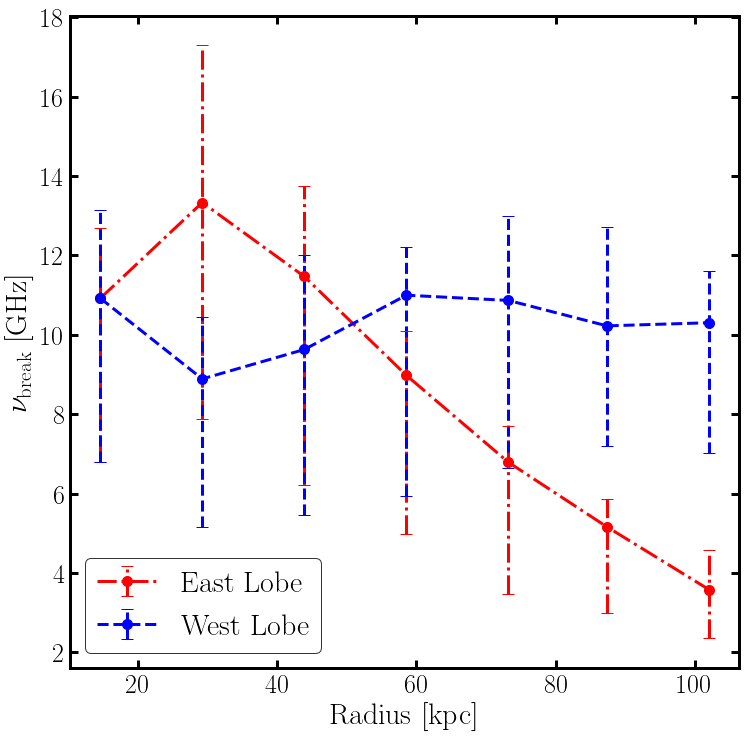

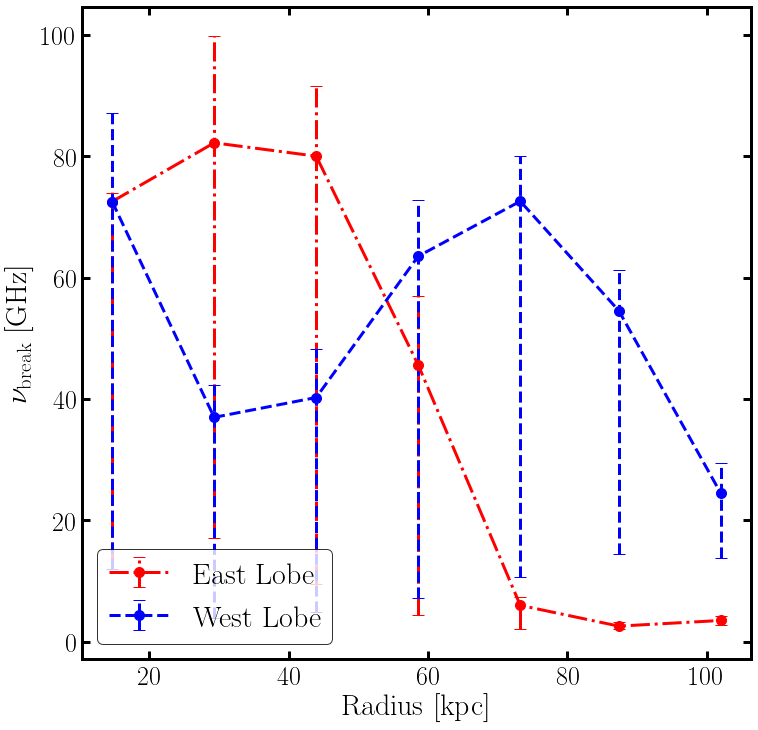

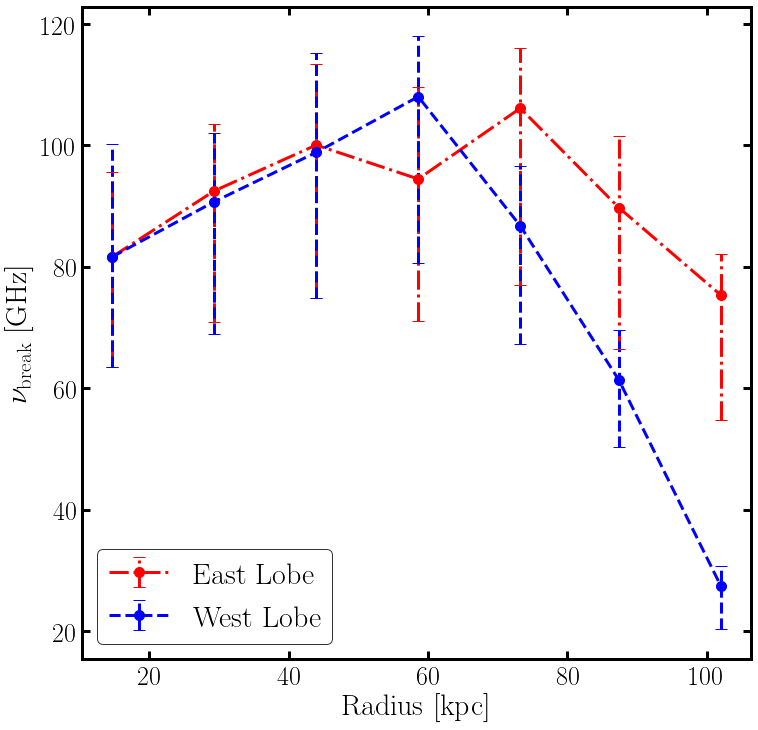

In [5]:
outplot = figDir+'BreakSlfCI.png'
plot_breaks(breaksCI,outplot)

print breaksJP

outplot = figDir+'BreakSlfCIOFF.png'
plot_breaks(breaksCIOFF,outplot)

outplot = figDir+'BreakSlfJP.png'
plot_breaks(breaksJP,outplot)


	-----> Loaded <-----


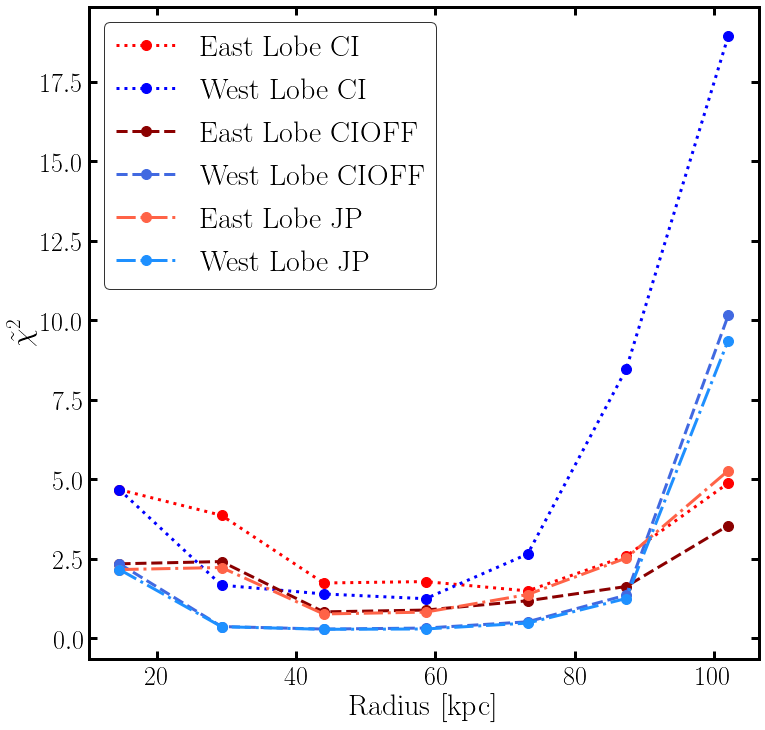

In [6]:
def plot_chis(chisCI,chisCIOFF,chisJP,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Radius [kpc]')
    ax1.set_ylabel(r'$\tilde{\chi}^2$')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-1,2e3])
    #ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    eb1 = ax1.plot(chisCI[0,:,1],chisCI[0,:,0],
                color='red',label='East Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisCI[1,:,1],chisCI[1,:,0],
                 color='blue',label='West Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(chisCIOFF[0,:,1],chisCIOFF[0,:,0],
                color='darkred',label='East Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisCIOFF[1,:,1],chisCIOFF[1,:,0],
                 color='royalblue',label='West Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(chisJP[0,:,1],chisJP[0,:,0],
                color='tomato',label='East Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(chisJP[1,:,1],chisJP[1,:,0],
                 color='dodgerblue',label='West Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb2[-1][0].set_linestyle('--')
    
    
    legend = plt.legend(loc=2, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'

#outplot = figDir+'ChiAnCI.png'
#plot_breaks(chiCI,outplot)

outplot = figDir+'ChiSlCIOFF.png'
plot_chis(chiCI,chiCIOFF,chiJP,outplot)

#outplot = figDir+'ChiAnJP.png'
#plot_breaks(chiJP,outplot)


	-----> Loaded <-----


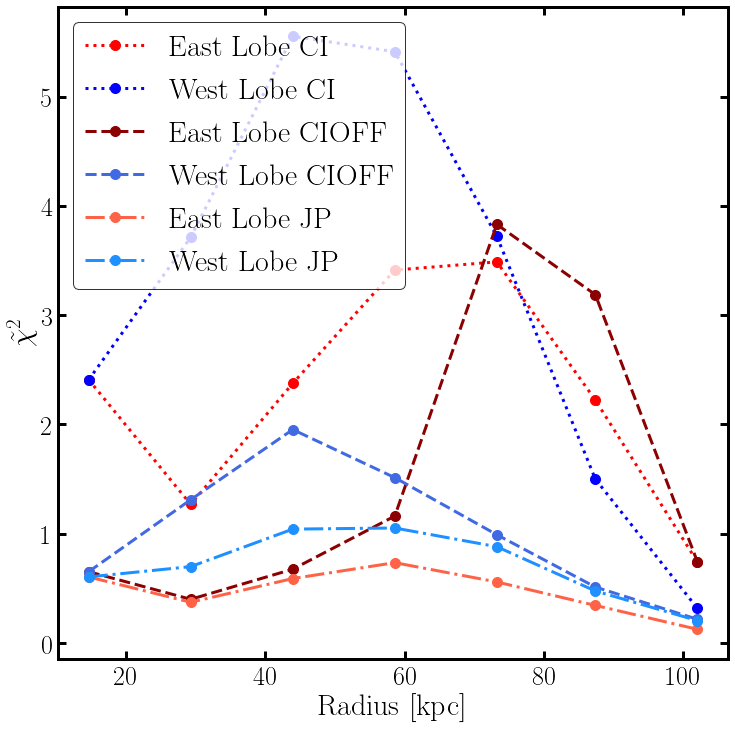

In [7]:
def plot_nomr(normCI,normCIOFF,normJP,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Radius [kpc]')
    ax1.set_ylabel(r'$\tilde{\chi}^2$')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    #ax1.set_xscale("log", nonposx='clip')
    #ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-1,2e3])
    #ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    eb1 = ax1.plot(normCI[0,:,1],normCI[0,:,0],
                color='red',label='East Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(normCI[1,:,1],normCI[1,:,0],
                 color='blue',label='West Lobe CI',markersize=10,marker='o',linestyle=':') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(normCIOFF[0,:,1],normCIOFF[0,:,0],
                color='darkred',label='East Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(normCIOFF[1,:,1],normCIOFF[1,:,0],
                 color='royalblue',label='West Lobe CIOFF',markersize=10,marker='o',linestyle='--') 
    #eb2[-1][0].set_linestyle('--')
    
    
    eb1 = ax1.plot(normJP[0,:,1],normJP[0,:,0],
                color='tomato',label='East Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb1[-1][0].set_linestyle('-.')
    eb2 = ax1.plot(normJP[1,:,1],normJP[1,:,0],
                 color='dodgerblue',label='West Lobe JP',markersize=10,marker='o',linestyle='-.') 
    #eb2[-1][0].set_linestyle('--')
    
    
    legend = plt.legend(loc=2, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'

#outplot = figDir+'ChiAnCI.png'
#plot_breaks(chiCI,outplot)

outplot = figDir+'NormSlCIOFF.png'
plot_chis(normCI,
          normCIOFF,normJP,outplot)

#outplot = figDir+'ChiAnJP.png'
#plot_breaks(chiJP,outplot)

In [8]:
lobe = ['ee','ww']
lobeName = ['E','W']

#regions = [totReg, elReg, wlReg]

breaksJP = np.zeros([2,7,4])
breaksJP[:,:,3] = [145,290,435,580,725,865,1010]
breaksJP[:,:,3] *= 101/1e3

fileName = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency.FITS'

datas,heads = fint.openFile(fileName)
datas=np.squeeze(datas)
fileName = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency_ERR.FITS'
datasErr,headsErr = fint.openFile(fileName)
datasErr=np.squeeze(datasErr)

for k in xrange(0,2):
        
        for j in xrange (0,7):
            region = regDir+'Fa_slices_'+lobe[k]+str(j)+'.reg'
            print region
            r = pyregion.open(region).as_imagecoord(heads)
            shape = (heads['NAXIS2'], heads['NAXIS1'])
            m = r.get_mask(shape=shape)

            breaksJP[k,j,0] = np.nanmedian(datas[m==True])/1e3
            print  breaksJP[k,j,0]
            breaksJP[k,j,1] = -np.nanmedian(datasErr[m==True])/1e3
            breaksJP[k,j,2] = -breaksJP[k,j,1]

print '''\t+---------+\n\t Fluxes measured\n\t Tables Saved\n\t+---------+'''
  

/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee0.reg
119.3459921875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee1.reg
129.68796875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee2.reg
109.719625
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee3.reg
108.038171875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee4.reg
118.4535546875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee5.reg
111.445765625
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ee6.reg
159.85125
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ww0.reg
119.3459921875
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/slice_regions/Fa_slices_ww1.reg
90.176703125
/home/maccagni/Projects/MFS/FornaxA/contData/inIms/regions/sl

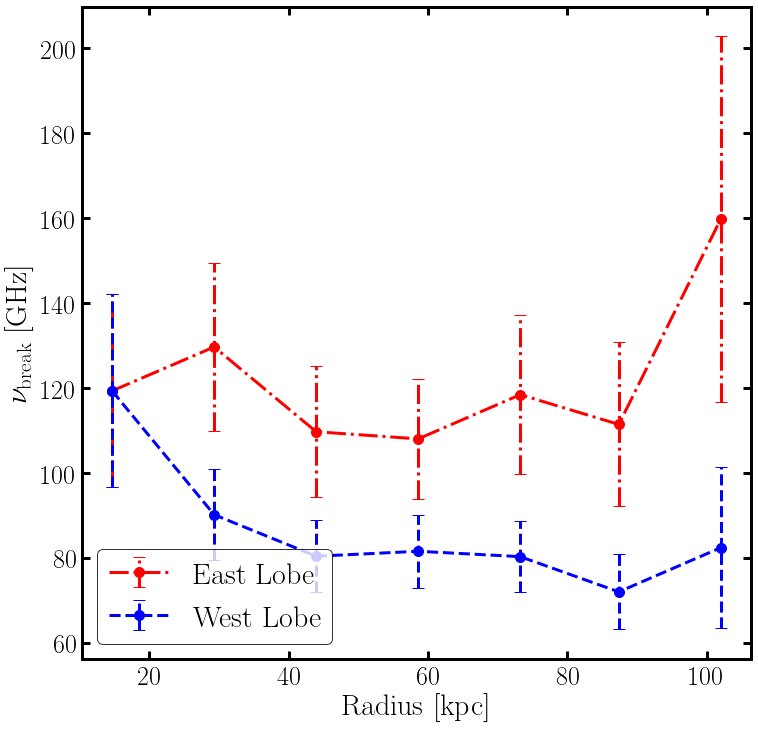

In [9]:
outplot = figDir+'BreakSlfJP_map.png'
plot_breaks(breaksJP,outplot)